# PA2 Random forests
#### Applied Machine Learning
Grpup 39: Sebastian Kölbel & Min Ze Teh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task1
We begin by importing the testing and training csv files using pandas and dividing the sets into input and output.

In [71]:
training = pd.read_csv('Data/adult_train.csv')
X_train = training.drop('target', axis=1)
Y_train = training['target']

testing = pd.read_csv('Data/adult_test.csv')
X_test = testing.drop('target', axis=1)
Y_test = testing['target']

To use the classifiers in sklearn we first have to make our input values into numerical values.
The way used here is one-hot encoding, which we performed by first making our input into dictionaries and then running the dictionaries into the imported function DictVectorizer(). We picked gradient boosting classfier as it was one of the top performing classifiers in the previous assignment. However, as the data is different this time around, this might no longer be the case.

In [72]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Create dictionaries of our train and testing input data.
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

# Creating matrix from dictionaries
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

# Picking gradient boosting classifier and performing cross validation
gbc_clf = gbc(max_depth=5,random_state=1)
print('Gradient boosting classifier cross_val_score:', cross_val_score(gbc_clf, X_train_encoded, Y_train).mean())

# Testing accuracy of the classifier
gbc_clf.fit(X_train_encoded, Y_train)
Y_guess = gbc_clf.predict(X_test_encoded)

print('Gradient boosting classifier accuracy: ',accuracy_score(Y_test, Y_guess))


Gradient boosting classifier cross_val_score: 0.871564280246915
Gradient boosting classifier accuracy:  0.8740863583317978


We then created a pipeline using the same steps as in the previous cell, but sequentially using make_pipeline(). 

In [78]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    DictVectorizer(),
    gbc(max_depth=5, random_state=1)
)

And a quick test to see that the pipeline works.

In [80]:
pipeline.fit(dicts_for_my_training_data, Y_train)
Y_guess2 = pipeline.predict(dicts_for_my_test_data)
print('accuracy test: ',accuracy_score(Y_test, Y_guess2))

accuracy test:  0.8740863583317978


## Task2
We begin by 

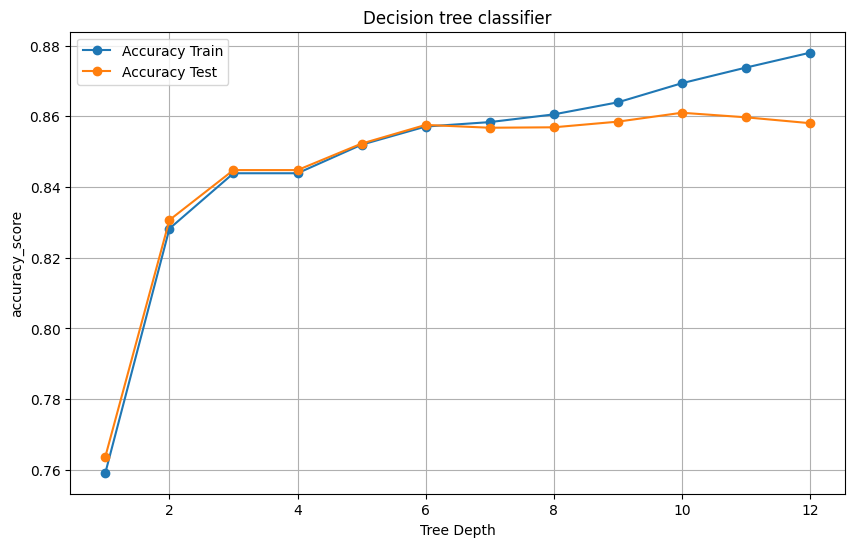

In [100]:
from sklearn.tree import DecisionTreeClassifier
acc_train = []
acc_test = []

for i in range(1,13):
    dtc_clf = DecisionTreeClassifier(max_depth=i)
    dtc_clf.fit(X_train_encoded, Y_train)

    # Train set
    acc_train.append(accuracy_score(Y_train, dtc_clf.predict(X_train_encoded)))

    # Test set
    acc_test.append(accuracy_score(Y_test, dtc_clf.predict(X_test_encoded)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), acc_train, label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test, label='Accuracy Test', marker='o')

plt.title('Decision tree classifier')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)
plt.show()

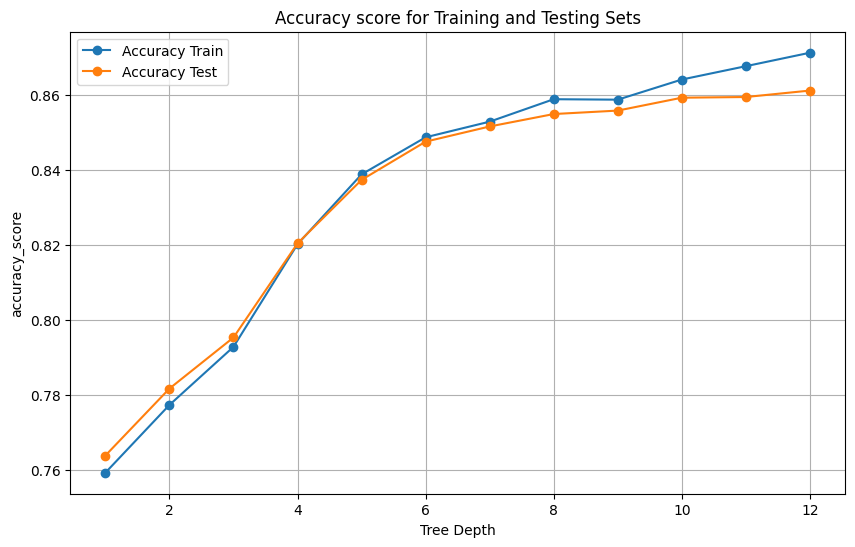

In [99]:
from sklearn.ensemble import RandomForestClassifier
acc_train2 = []
acc_test2 = []

for i in range(1,13):
    rfc_clf = RandomForestClassifier(max_depth=i)
    rfc_clf.fit(X_train_encoded, Y_train)

    # Train set
    acc_train2.append(accuracy_score(Y_train, rfc_clf.predict(X_train_encoded)))

    # Test set
    acc_test2.append(accuracy_score(Y_test, rfc_clf.predict(X_test_encoded)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), acc_train2, label='Accuracy Train', marker='o')
plt.plot(range(1,13), acc_test2, label='Accuracy Test', marker='o')

plt.title('Random forest classifier')
plt.xlabel('Tree Depth')
plt.ylabel('accuracy_score')
plt.legend()
plt.grid(True)
plt.show()